<center><h1><b> Exploratory Data Analysis</b></h1></center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv('autos_updated_4.13.23.csv', index_col=0)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body=style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned
0,3,122,alfa-romero,0,0,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Low
1,3,122,alfa-romero,0,0,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Low
2,1,122,alfa-romero,0,0,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium
3,2,164,audi,0,0,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,Low
4,2,164,audi,0,0,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,Low


In [3]:
#Basic summary statistics
df.describe()

,symboling,normalized-losses,fuel-type,aspiration,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,0.099502,0.179104,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330711,3.256904,10.164279,103.393035,5117.587940,25.179104,30.686567,13207.129353,9.944145,8.044957
std,1.254802,31.99625,0.300083,0.384397,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365623,478.113178,6.423220,6.815150,7947.066342,2.534599,1.840739
min,-2.000000,65.00000,0.000000,0.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852
25%,0.000000,101.00000,0.000000,0.000000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765
50%,1.000000,122.00000,0.000000,0.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000,9.791667,7.833333
75%,2.000000,137.00000,0.000000,0.000000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000
max,3.000000,256.00000,1.000000,1.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500


In [4]:
#Summarize categorical data for 'drive-wheels' column
drive_wheel_counts=df['drive-wheels'].value_counts().to_frame()
drive_wheel_counts.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheel_counts

,value_counts
fwd,118
rwd,75
4wd,8


<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

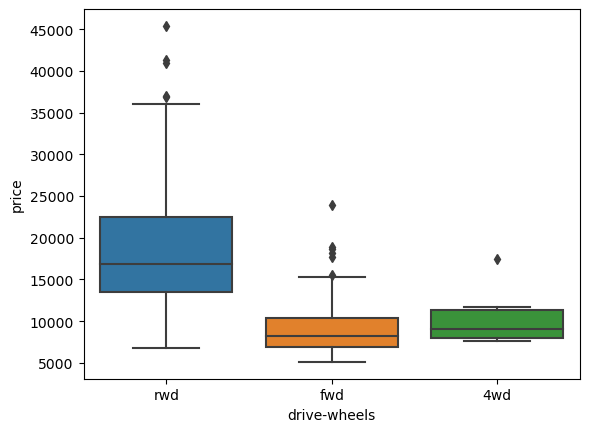

In [5]:
#Create a boxplot to visualize distribution, outliers and skewness of 'price' and 'drive-wheels'
sns.boxplot(x='drive-wheels', y='price', data=df)

Text(0, 0.5, 'Price')

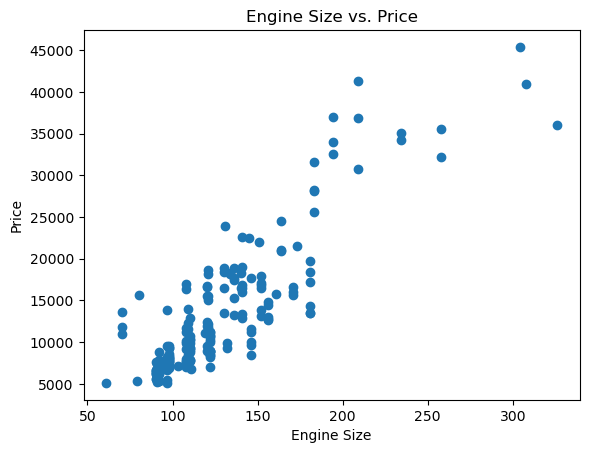

In [6]:
mpl.scatter(x='engine-size', y='price', data=df)
mpl.title('Engine Size vs. Price')
mpl.xlabel('Engine Size')
mpl.ylabel('Price')

<b> Another way to make the same scatterplot: </b>

Text(0, 0.5, 'Price')

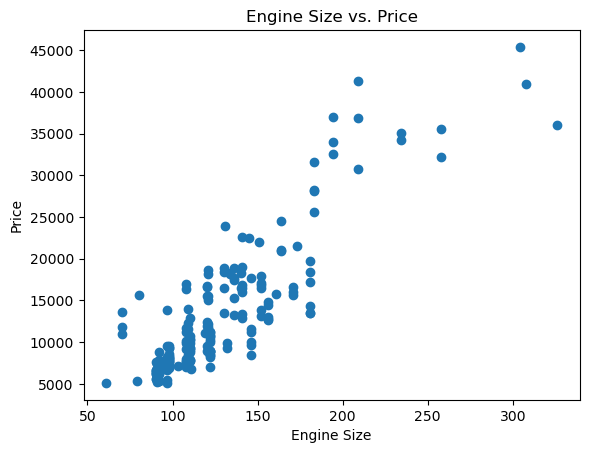

In [7]:
x=df['engine-size']
y=df['price']
mpl.scatter(x,y)

mpl.title('Engine Size vs. Price')
mpl.xlabel('Engine Size')
mpl.ylabel('Price')

<b> Visually, it does look like theres a positive linear relationship between these two variables! </b>

## <b> Grouping Data </b>

<b> Find average price of vehicles and see how they differ between body-styles and drive wheels </b>

In [8]:
df_test=df[['price', 'body=style', 'drive-wheels']]
df_test

,price,body=style,drive-wheels
0,13495.0,convertible,rwd
1,16500.0,convertible,rwd
2,16500.0,hatchback,rwd
3,13950.0,sedan,fwd
4,17450.0,sedan,4wd
...,...,...,...
196,16845.0,sedan,rwd
197,19045.0,sedan,rwd
198,21485.0,sedan,rwd
199,22470.0,sedan,rwd


In [9]:
df_grp= df_test.groupby(['drive-wheels', 'body=style'], as_index=False).mean()
df_grp

,drive-wheels,body=style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


**Transform to a pivot table**

In [10]:
df_pivot=df_grp.pivot(index='drive-wheels', columns='body=style')
df_pivot

price                                            \
body=style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body=style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

## <b>Heatmaps</b>

<AxesSubplot:xlabel='None-body=style', ylabel='drive-wheels'>

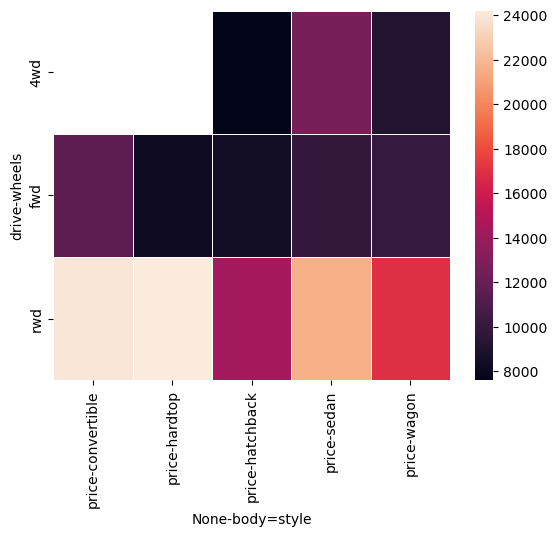

In [11]:
sns.heatmap(df_pivot, linewidth=.5)

We can see that the bottom section of the heatmap (for RWD) has higher prices

**Another way to do a heatmap:**

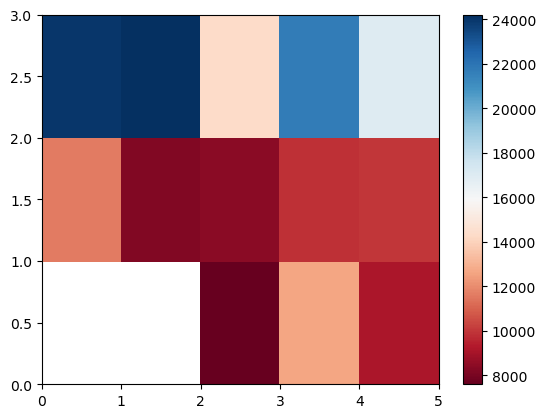

In [12]:
mpl.pcolor(df_pivot, cmap='RdBu')
mpl.colorbar()

## <b>Correlation</b>
- The measure of how interdependent variables are
- A linear association between two numerical variables

<b> Create a scatterplot with a regression line for 'engine-size' and 'price' </b>

(0.0, 53302.003496858015)

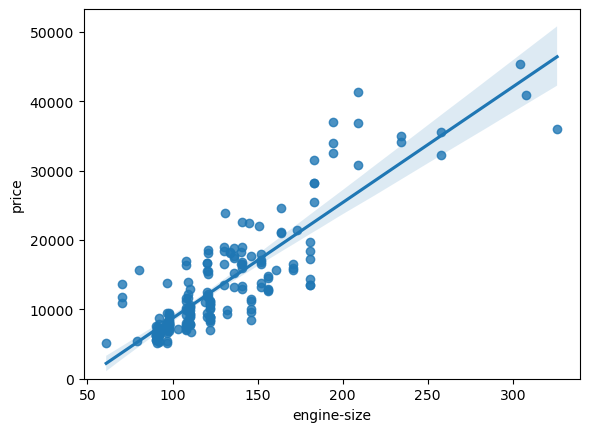

In [13]:
sns.regplot(x='engine-size', y='price', data=df) 
mpl.ylim(0,) #lower limit of the y-axis is 0

This shows a positive linear relationship between engine-size and price

(0.0, 48168.10966727041)

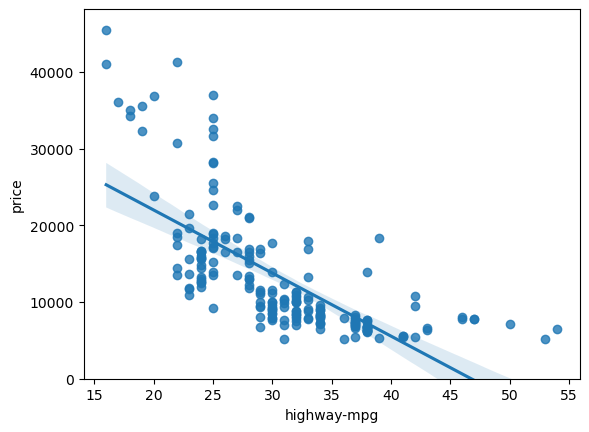

In [14]:
sns.regplot(x='highway-mpg', y='price', data=df) 
mpl.ylim(0,)

This shows a negative linear relationship between highway-mpg and price

**Calculate Pearson Correlation statistics for engine-size and price**

In [30]:
pearson_coef, p_value=stats.pearsonr(df['engine-size'], df['price'])
print('Pearson Coefficient:', pearson_coef, 'P-value:', p_value)

Pearson Coefficient: 0.8723351674455185 P-value: 9.265491622198389e-64


This confirms that there is a positive linear relationship between our two variables! 
- p<0.5
- pearson coefficient close to 1

**Create a heatmap correlation matrix**

<AxesSubplot:>

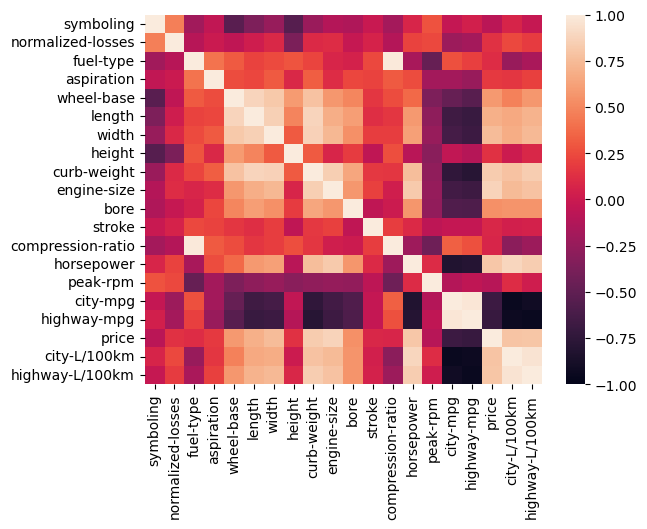

In [16]:
matrix=df.corr()
sns.heatmap(matrix, vmin=-1, vmax=1)

Lighter colors indicate a higher positive correlation

## <b>Chi-Square Test</b>
<p> is there an association between categorical variables? </p>

In [17]:
from scipy.stats import chi2_contingency 

In [18]:
chi_sq_table=pd.crosstab(df['fuel-type'], df['aspiration'], margins=True)
print(chi_sq_table)

aspiration    0   1  All
fuel-type               
0           158  23  181
1             7  13   20
All         165  36  201


In [29]:
Chi_Square=chi2_contingency(chi_sq_table, correction=True)
print('Chi Square Results:',Chi_Square)

if p_value <= 0.05: 
    print('Reject Null Hypothesis') 
else: 
    print('Accept Null Hypothesis') 

Chi Square Results: (33.496718985434455, 9.450137077403056e-07, 4, array([[148.58208955,  32.41791045, 181.        ],
       [ 16.41791045,   3.58208955,  20.        ],
       [165.        ,  36.        , 201.        ]]))
Reject Null Hypothesis


<p>This means that the Chi-square test value is 33.496718985434455, the p-value is 9.450137077403056e-07 and the degrees of freedom is 4</p>

<p>There is evidence of an association between fuel-type and aspiration!</p>

## <b>Analysis of Variance</b>
<p> Is there a significant difference between the means of two or more groups? </p>

**Do different types of drive-wheels affect the price of the car?**

In [26]:
grouped_test=df_test[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [27]:
grouped_test.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [28]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test.get_group('fwd')['price'], grouped_test.get_group('rwd')['price'], grouped_test.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This means that there is a significant statistical different between different fuel-type prices!

<center><h1><b>Resources</b></h1></center>

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://www.statology.org/seaborn-regplot-equation/

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html 

https://datagy.io/python-correlation-matrix/

https://www.statology.org/seaborn-regplot-equation/

https://www.askpython.com/python/examples/chi-square-test

https://www.geeksforgeeks.org/pandas-groupby/